# This code is for creating a figure of Northern Wild Rice (NWR) collection sites for the genetic diversity study

### written by: Matthew Haas

In [1]:
# Load necessary packages
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point # for Point()
import shapely.geometry
from matplotlib.lines import Line2D
#import cartopy as ccrs # for scale bar
import os # for getting working directory
import fiona
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib_scalebar.scalebar import SI_LENGTH

In [2]:
os.chdir('/Users/matthewwilliamhaas/Documents/wild_rice/collection_map') # Sets working directory

In [3]:
# The issue of projection data from the US Census has been fixed; it's OK to use this file now.
states = "cb_2018_us_county_20m.shp" # ALL US counties
collection_sites = "200224_wild_rice_samples.csv" # This updated file has GPS coordinates converted to Universal Transverse Mercator (UTM) format

map_states = gpd.read_file(states) # read in counties
nwr_sites = pd.read_csv(collection_sites) # read in collection sites

In [4]:
# This code is crucial to achieving the projection that I want (matches the great MN GIS data)
map_states = map_states.to_crs({"init" : "epsg:26915"})

In [5]:
# Select Minnesota from the US shape file
#These lines of code are not needed if I stick with the shape file provided by the State of Minnesota versus the Census Bureau
MN_WI = map_states[(map_states.STATEFP == "27") | (map_states.STATEFP == "55")] # MN is 27 and WI is 55

In [6]:
# This section is for converting the latitude and longitude data into a form recognizable to geopandas
# The issue with the original projection issue is that the latitude and longitude needed to be converted to UTM format. I did the conversion of GPS coordinates with an online tool and created new columns in the CSV file containing the sample collection data.
def make_point(row):
    return Point(row.UTM_easting, row.UTM_northing) # Point() requires shapely.geometry

points = nwr_sites.apply(make_point, axis=1)
nwr_points = gpd.GeoDataFrame(nwr_sites, geometry=points)

In [7]:
# Not a very elegant approach, but this is how I think I need to go about plotting unique colors for each lake
aquatica = nwr_points[nwr_points.Location == "Aquatica_species"]
bass = nwr_points[nwr_points.Location == "Bass Lake"]
bigfork = nwr_points[nwr_points.Location == "Big Fork River"]
clearwater = nwr_points[nwr_points.Location == "Clearwater River"]
dahler = nwr_points[nwr_points.Location == "Dahler Lake"]
decker = nwr_points[nwr_points.Location == "Decker Lake"]
garfield = nwr_points[nwr_points.Location == "Garfield Lake"]
mudhen = nwr_points[nwr_points.Location == "Mud Hen Lake"]
necktie = nwr_points[nwr_points.Location == "Necktie River"]
ottertail = nwr_points[nwr_points.Location == "Ottertail River"]
phantom = nwr_points[nwr_points.Location == "Phantom Lake"]
plantagenet = nwr_points[nwr_points.Location == "Plantagenet"]
shell = nwr_points[nwr_points.Location == "Shell Lake"]
upperrice= nwr_points[nwr_points.Location == "Upper Rice Lake"]

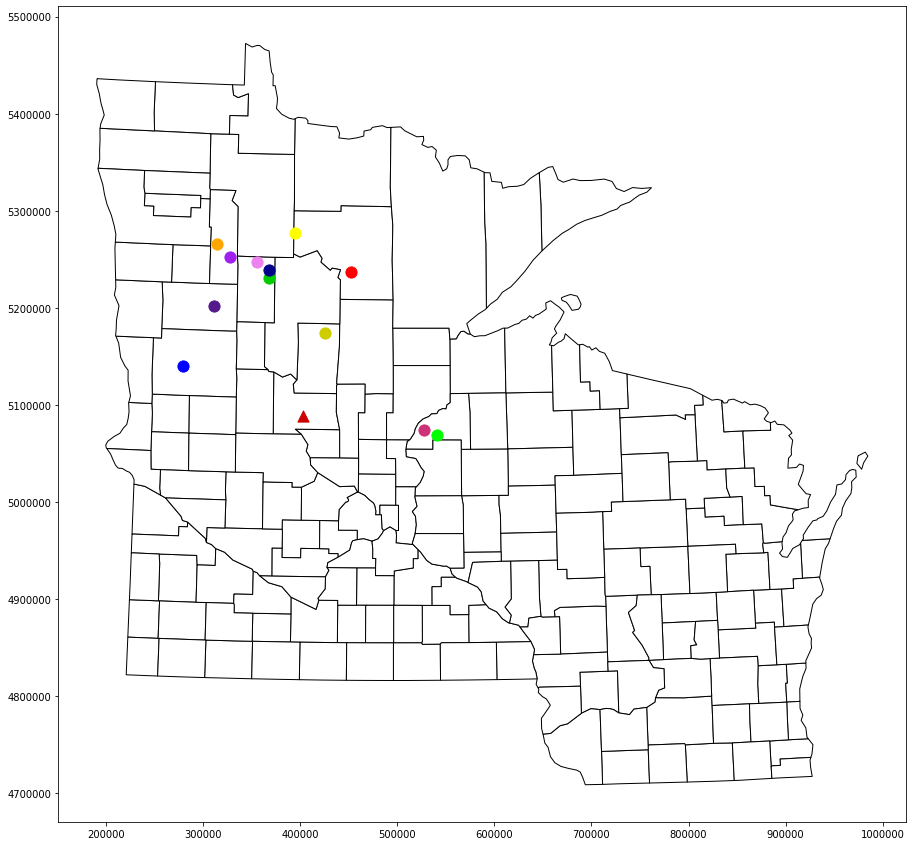

In [8]:
# Start the plotting
fig, ax = plt.subplots(1, figsize=(20,15))
MN_WI.plot(color="white", linewidth=1.0, ax=ax, edgecolor="black")
aquatica.plot(marker="^", markersize=125, ax=ax, color="#cd0000" ) # Aquatica
bass.plot(markersize=125, ax=ax, color="#ff0000") # Bass Lake
#bigfork.plot(markersize=125, ax=ax, color="#cd8500")# Big Fork River
clearwater.plot(markersize=125, ax=ax, color="#ffa600") # Clearwater River
dahler.plot(markersize=125, ax=ax, color="#cdcd00") # Dahler Lake
decker.plot(markersize=125, ax=ax, color="#ffff00") # Decker Lake
garfield.plot(markersize=125, ax=ax, color="#00cd00") # Garfield Lake
mudhen.plot(markersize=125, ax=ax, color="#00ff00") # Mud Hen Lake
necktie.plot(markersize=125, ax=ax, color="#00008b") # Necktie River
ottertail.plot(markersize=125, ax=ax, color="#0000ff") # Ottertail River
phantom.plot(markersize=125, ax=ax, color="#cd3278") # Phantom Lake
plantagenet.plot(markersize=125, ax=ax, color="#ee82ee") # Plantagenet
shell.plot(markersize=125, ax=ax, color="#541a8b") # Shell Lake
upperrice.plot(markersize=125, ax=ax, color="#a020f0") # Upper Rice Lake

### For the legend, something to work on would be to change the font family to a serif font (e.g., Times New Roman)

In [9]:
# Generate info for legend
legend_points = [Line2D([0],[0], color="#cd0000", marker="^", markersize=25, linestyle="none", label="$\it{Z. aquatica}$"), 
				 Line2D([0],[0], color="#ff0000", marker="o", markersize=25, linestyle="none", label="Bass Lake"), 
				 #Line2D([0],[0], color="#cd8500", marker="o", markersize=25, linestyle="none", label="Big Fork River"), 
				 Line2D([0],[0], color="#ffa600", marker="o", markersize=25, linestyle="none", label="Clearwater River"), 
				 Line2D([0],[0], color="#cdcd00", marker="o", markersize=25, linestyle="none", label="Dahler Lake",), 
				 Line2D([0],[0], color="#ffff00", marker="o", markersize=25, linestyle="none", label="Decker Lake"), 
				 Line2D([0],[0], color="#00cd00", marker="o", markersize=25, linestyle="none", label="Garfield Lake"), 
				 Line2D([0],[0], color="#00ff00", marker="o", markersize=25, linestyle="none", label="Mud Hen Lake"), 
				 Line2D([0],[0], color="#00008b", marker="o", markersize=25, linestyle="none", label="Necktie River"), 
				 Line2D([0],[0], color="#0000ff", marker="o", markersize=25, linestyle="none", label="Ottertail River"), 
				 Line2D([0],[0], color="#cd3278", marker="o", markersize=25, linestyle="none", label="Phantom Lake"), 
				 Line2D([0],[0], color="#ee82ee", marker="o", markersize=25, linestyle="none", label="Plantagenet"), 
				 Line2D([0],[0], color="#541a8b", marker="o", markersize=25, linestyle="none", label="Shell Lake"), 
				 Line2D([0],[0], color="#a020f0", marker="o", markersize=25, linestyle="none", label="Upper Rice Lake")]

In [10]:
# Plot the legend
ax.legend(handles=legend_points, loc="lower right", facecolor="white", prop={"size":25}) # I thought facecolor would make background white vs. partially transparent. Maybe I'm using it wrong?

# Define scale bar
# 1 pixel = 1 meter. Units are labeled as meters, but that is the default anyway... Scale bar is in kilometers.
scalebar = ScaleBar(dx=1, 
                    units="m", 
                    dimension=SI_LENGTH, 
                    location="lower center", # positions the scale bar (default=upper right)
                    font_properties="Times-30") # Makes label Times New Roman (serif) and size=30

                        
# Add scale bar
ax.add_artist(scalebar)

fig.suptitle("Northern Wild Rice Collection Sites", fontsize=50, family="serif")
ax.axis("off") # turn off the axis

fig.savefig("200501_NWR_collection_map_by_county.png", dpi=300) # save figure to a file